In [40]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

In [41]:
df_books = pd.read_csv('data/books.csv') #importing in the csv
df_book_tags = pd.read_csv('data/book_tags.csv')
df_ratings = pd.read_csv('data/ratings.csv')
df_tags = pd.read_csv('data/tags.csv')

In [42]:
maskL = df_books['language_code'] == 'eng'

In [43]:
df_books = df_books[maskL]
df_books.head()

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...
5,6,11870085,11870085,16827462,226,525478817,9.780525e+12,John Green,2012.0,The Fault in Our Stars,...,2346404,2478609,140739,47994,92723,327550,698471,1311871,https://images.gr-assets.com/books/1360206420m...,https://images.gr-assets.com/books/1360206420s...


In [44]:
df_book_tags.head()

,goodreads_book_id,tag_id,count
0,1,30574,167697
1,1,11305,37174
2,1,11557,34173
3,1,8717,12986
4,1,33114,12716


In [45]:
df_ratings.head()

,book_id,user_id,rating
0,1,314,5
1,1,439,3
2,1,588,5
3,1,1169,4
4,1,1185,4


In [46]:
df_tags.head()

,tag_id,tag_name
0,0,-
1,1,--1-
2,2,--10-
3,3,--12-
4,4,--122-


In [47]:
df_tags_books = df_book_tags.merge(df_tags, left_on='tag_id', right_on='tag_id')

In [48]:
df_rating_tags = df_tags_books.merge(df_ratings, left_on='goodreads_book_id', right_on='book_id')

In [49]:
df_rating_tags.head()

,goodreads_book_id,tag_id,count,tag_name,book_id,user_id,rating
0,1,30574,167697,to-read,1,314,5
1,1,30574,167697,to-read,1,439,3
2,1,30574,167697,to-read,1,588,5
3,1,30574,167697,to-read,1,1169,4
4,1,30574,167697,to-read,1,1185,4


In [50]:
df_user_tags = df_rating_tags[["tag_name","user_id", 'rating']].sort_values(by=['tag_name','user_id'])

In [58]:
use_less_tag = ['-', 'to-read','--12-','--33-','--62-','-d-c--', 'owned',
               'books-i-own','currently-reading','i-own','ebook','kindle',
               'owned-books','my-library','to-buy', 'my-books', 'own-it',
               'wish-list','book-club','favorites','default','audiobook',
               'audiobooks','favourites','ebooks','audio','books','re-read',
               'unfinished','abandoned','borrowed','home-libary']
#mask1 = df_user_tags['tag_name'].isin(use_less_tag)
for i in ['read', 'book', 'favorite', 'own', 'audio', 'wish-list', '--', 'library','buy','kindle','finish','have','audi','borrowed','favourites','default']:
    mask1 = df_user_tags['tag_name'].str.contains(i)
    df_user_tags= df_user_tags[~mask1]
df_user_tags['tag_name'].value_counts().reset_index()

,index,tag_name
0,fiction,72095
1,novels,60461
2,adult,58271
3,novel,53455
4,literature,49162
5,english,48927
6,adult-fiction,47201
7,classics,44850
8,abandoned,44497
9,contemporary,43803


In [24]:
df_user_tags[['tag_name','rating']].groupby(['tag_name'] ).count().sort_values('rating', ascending=False)

,rating
tag_name,
favorites,78606
default,77129
library,76772
fiction,72095
novels,60461
adult,58271
audiobook,56079
audiobooks,55922
favourites,54699


In [21]:
test['tag_name']

KeyError: 'tag_name'

In [14]:
def isolate_tag(df, tag):
    mask = df['tag_name'] == tag
    df_new = df[mask]
    print(df_new.head())
    test = df_new[['user_id','rating']].groupby(['user_id']).count()
    print(test.head())
    df_new = df_new.merge(test, left_on='user_id', right_index=True)
    df_new = df_new.rename(index=str, columns = {"rating_x": 'user_rating' , 'rating_y':'books_read'})
    #mask2 = df_new['books_read'] > 5
    #df_new = df_new[mask2]
    return df_new

In [15]:
df_fantasy = isolate_tag(df_user_tags, 'history-historical')
df_fantasy.head()

Empty DataFrame
Columns: [tag_name, user_id, rating]
Index: []
Empty DataFrame
Columns: [rating]
Index: []


,tag_name,user_id,user_rating,books_read
user_id,,,,


(4105, 4)

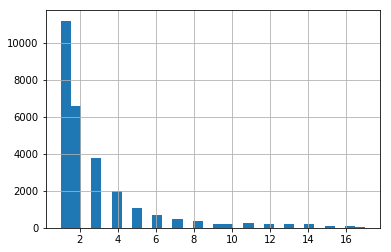

In [16]:
df_fantasy['books_read'].hist(bins = 30)
df_fantasy[df_fantasy['books_read']>=5].shape

In [17]:
df_scifi = isolate_tag(df_user_tags, 'sci-fi')

        tag_name  user_id  rating
7302220   sci-fi        3       1
5056300   sci-fi       10       4
5773824   sci-fi       15       4
7059000   sci-fi       23       4
3846400   sci-fi       24       4
         rating
user_id        
3             1
10            1
15            1
23            1
24            1


(1568, 4)

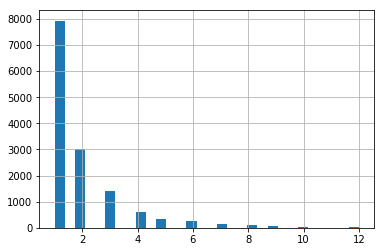

In [18]:
df_scifi['books_read'].hist(bins = 30)
df_scifi[df_scifi['books_read']>=4].shape

In [19]:
def avg_metric_by_product(df, tag):
    '''
    INPUT: dataframe, string
    OUTPUT: dataframe
    Groups dataframe by product id and averages each product over the given
    metric (column)
    '''

    return df.groupby('user_id').mean()[tag].reset_index()

def get_beta_params(df, tag):
    '''
    INPUT: dataframe, string
    OUTPUT: float, float
    Calculates alpha and beta for beta distribution using the mean and standard
    deviation
    '''
    df[tag] = df[tag]/df[tag].max()
    mu = np.mean(df.loc[:,tag])
    sd = np.std(df.loc[:,tag])
    alpha = (((1 - mu )/sd**2) - (1/mu)) * mu**2
    beta = alpha * ((1 / mu) - 1)
    return(alpha, beta)

def beta_test(a1, a2, b1, b2):
    '''
    INPUT: float, float, float, float
    OUTPUT: float
    Runs a Baysian hypothesis test on two distributions with parameters a and b.
    Returns a probability
    '''
    count = 0
    for i in range(10000):
        if np.random.beta(a1, b1) > np.random.beta(a2, b2):
            count +=1
    return count/10000

def plot_distribution(tag1_avg, tag2_avg, tag):
    '''
    INPUT: dataframe, dataframe, string
    OUTPUT: graph
    Graphs the probability distribution of a column from each of two dataframes along with
    their fitted beta distribution
    '''
    tag1_a, tag1_b = get_beta_params(tag1_avg, tag)
    tag2_a, tag2_b = get_beta_params(tag2_avg, tag)
    random_variable = tag.replace('_', ' ')

    fig = plt.figure(figsize=(16, 16))
    ax = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)

    x = np.linspace(0, 1, 100)

    ax.plot(x, stats.beta.pdf(x, tag1_a, tag1_b),'r-', lw=5, alpha=0.6, label='beta pdf')
    ax2.plot(x, stats.beta.pdf(x, tag2_a, tag2_b),'r-', lw=5, alpha=0.6, label='beta pdf')

    ax.hist(tag1_avg[tag], bins = 15, rwidth = 0.75, density = True)
    ax2.hist(tag2_avg[tag], bins = 15, rwidth = 0.75, density = True)

    ax.set_ylabel(f'P({random_variable} = x)')
    ax.set_xlabel('x')
    ax2.set_ylabel(f'P({random_variable} = x)')
    ax2.set_xlabel('x')
    #ax.set_title('Vine reviews - ' + tag.replace('_', ' '))
    #ax2.set_title('Verified reviews - ' + tag.replace('_', ' '))

    fig2 = plt.figure(figsize=(16, 16))
    bx = fig2.add_subplot(111)
    bx.plot(x, stats.beta.pdf(x, tag1_a, tag1_b),'r-', lw=5, alpha=0.6, label='beta pdf')
    bx.plot(x, stats.beta.pdf(x, tag2_a, tag2_b),'b-', lw=5, alpha=0.6, label='beta pdf')
    bx.set_ylabel(f'P({random_variable} = x)')
    bx.set_xlabel('x')
    #bx.set_title('Vine reviews - ' + tag.replace('_', ' '))

def compile_analysis(tag1, tag2, tag):
    '''
    INPUT: dataframe, dataframe, string
    OUTPUT: float
    Calls above functions and returns results of hypothesis test.
    '''
    tag1_avgs = avg_metric_by_product(tag1, tag)
    tag2_avgs = avg_metric_by_product(tag1, tag)

    plot_distribution(tag1_avgs, tag2_avgs, tag)

    tag1_a, tag1_b = get_beta_params(tag1_avgs, tag)
    tag2_a, tag2_b = get_beta_params(tag2_avgs, tag)

    probability = beta_test(tag1_a, tag2_a, tag1_b, tag2_b)*100
    return(beta_test(tag1_a, tag2_a, tag1_b, tag2_b))

0.5037

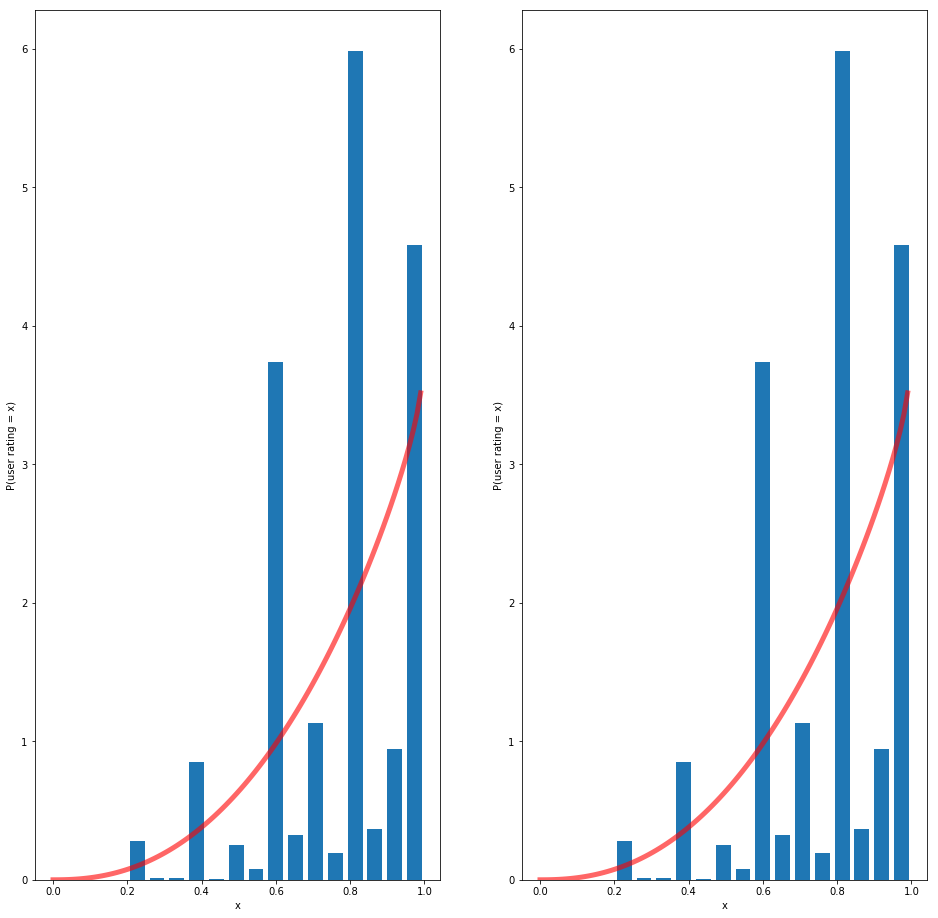

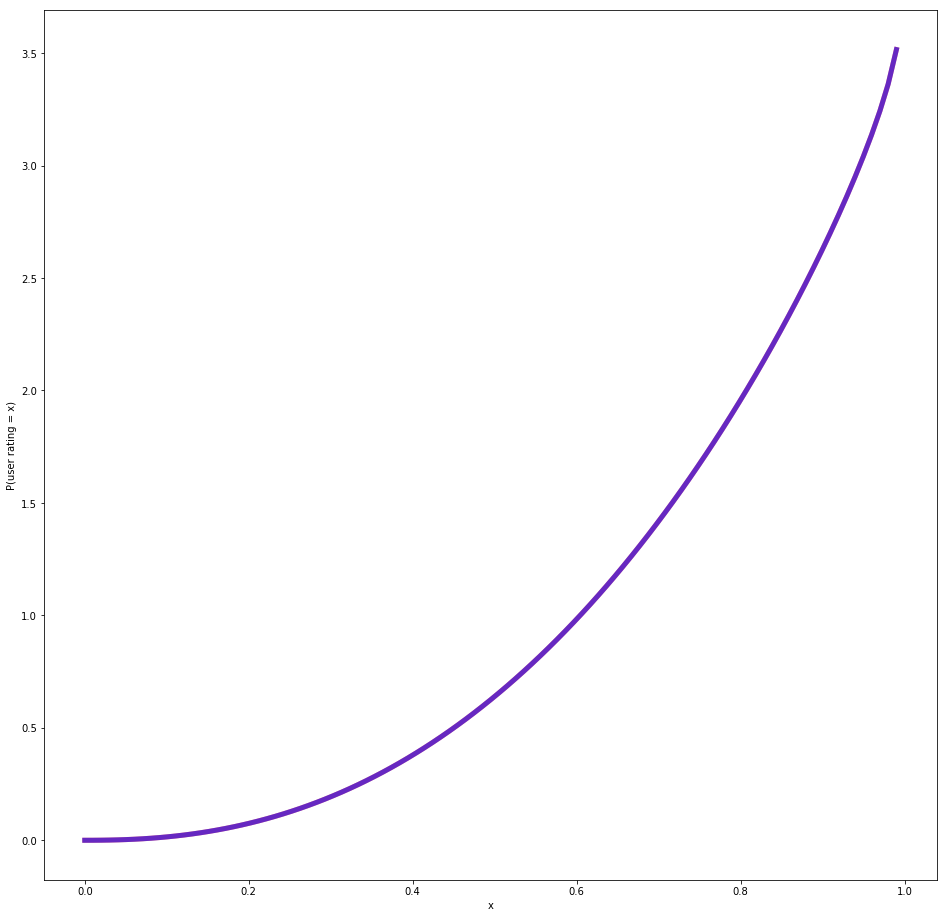

In [20]:
compile_analysis(df_fantasy, df_scifi, 'user_rating')

In [21]:
df_fantasy.head()

,tag_name,user_id,user_rating,books_read
7298780,fantasy,3,1,1
1280100,fantasy,7,5,1
5049900,fantasy,10,4,1
5770198,fantasy,15,4,1
6537200,fantasy,19,3,1


In [22]:
df_scifi.head()

,tag_name,user_id,user_rating,books_read
7302220,sci-fi,3,1,1
5056300,sci-fi,10,4,1
5773824,sci-fi,15,4,1
7059000,sci-fi,23,4,1
3846400,sci-fi,24,4,1


In [29]:
comb = df_fantasy[['user_id','tag_name']].merge(df_scifi, left_on='user_id', right_on='user_id')

In [30]:
mask = comb['books_read'] >= 4
comb = comb[mask]
comb

,user_id,tag_name_x,tag_name_y,user_rating,books_read
55,178,fantasy,sci-fi,4,4
56,178,fantasy,sci-fi,4,4
57,178,fantasy,sci-fi,4,4
58,178,fantasy,sci-fi,3,4
59,178,fantasy,sci-fi,4,4
60,178,fantasy,sci-fi,4,4
61,178,fantasy,sci-fi,4,4
62,178,fantasy,sci-fi,3,4
63,178,fantasy,sci-fi,4,4
64,178,fantasy,sci-fi,4,4


In [32]:
comb.groupby('user_id').mean()

,user_rating,books_read
user_id,,
178,3.750000,4.0
314,3.500000,4.0
439,3.333333,6.0
588,3.600000,5.0
1169,3.166667,6.0
1185,3.666667,6.0
1952,4.500000,4.0
2077,2.714286,7.0
2283,3.833333,6.0
